Battle of the Neighborhoods
======================


In [6]:
print ("Capstone Manhattan Battle of Neighborhood Project")
import pandas as pd
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
print('Libraries imported.')
import json 

Capstone Manhattan Battle of Neighborhood Project
Libraries imported.


### Data Understanding : Extracting 1st Parameter for our Project = NYPD Crime/Incident Data

In [7]:
# Data available for NYPD Open Data
df = pd.read_csv('NYPD_Crime.csv')
df.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [9]:
df.describe() # Basic Data Understanding

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.048575e+06,1.048575e+06,1.047842e+06,1.048574e+06,1.016158e+06,1.016158e+06,1.016158e+06,1.016158e+06
mean,5.497027e+08,2.953382e+02,4.099135e+02,6.380729e+01,1.004983e+06,2.067818e+05,4.073420e+01,-7.392516e+01
std,2.598666e+08,1.505240e+02,2.192328e+02,3.434066e+01,2.146524e+04,3.043238e+04,8.353300e-02,7.741049e-02
min,1.000007e+08,1.010000e+02,1.010000e+02,1.000000e+00,9.133190e+05,1.210800e+05,4.049877e+01,-7.425508e+01
25%,3.244583e+08,1.170000e+02,2.540000e+02,4.000000e+01,9.919982e+05,1.839220e+05,4.067144e+01,-7.397206e+01
50%,5.494480e+08,3.410000e+02,3.570000e+02,6.600000e+01,1.004598e+06,2.053300e+05,4.073021e+01,-7.392661e+01
75%,7.746526e+08,3.510000e+02,6.370000e+02,9.400000e+01,1.016552e+06,2.348090e+05,4.081116e+01,-7.388336e+01
max,9.999996e+08,8.810000e+02,9.750000e+02,1.230000e+02,1.067226e+06,2.718200e+05,4.091272e+01,-7.370058e+01


In [10]:
df.dtypes # Basic Data Understanding 

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
PARKS_NM              object
HADEVELOPT            object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lat_Lon               object
dtype: object

In [11]:
# Extract interested Features only (Offences Description, Location, Type of Premise , Police Dept and LatLong
nypd = df[["OFNS_DESC","LOC_OF_OCCUR_DESC","PREM_TYP_DESC","ADDR_PCT_CD","Latitude","Longitude"]] 

In [12]:
# get the first 100 crimes in the df_incidents dataframe  and clear from missing Data
limit = 1000
nypd_incidents = nypd.iloc[0:limit, :]
nypd_incidents.shape
nypd_incidents =  nypd_incidents.dropna()

### Data Understanding : Visualizing and Populating Incidents on Map

In [13]:
# Visualizing and Populating Incidents on Map
latitude = 40.7896239
longitude = -73.9598939
print('The geograpical coordinate of Manhattan New York City are {}, {}.'.format(latitude, longitude))

import folium

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[40.7896239,-73.9598939], zoom_start=13)

# add markers to map
for lat, lng, offence, loc_offence in zip(nypd_incidents['Latitude'],nypd_incidents['Longitude'],nypd_incidents['OFNS_DESC'],nypd_incidents['LOC_OF_OCCUR_DESC']):
    label = "Offence:{0} \n Location:{1}".format(offence, loc_offence)
    label = folium.Popup(label, parse_html=False)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.5,
        parse_html=False).add_to(map_newyork)  
map_newyork

The geograpical coordinate of Manhattan New York City are 40.7896239, -73.9598939.


### Data Understanding : Exploring alternative Incident Dataset/Report (ie 2019) Filtered based on 7 major Felony in Neighborhoods only

In [14]:
nypdreport = pd.read_csv('seven-major-felony-Manhattan-2019 cleaned.csv')
df = pd.DataFrame(nypdreport)

In [15]:
#Group data by neighborhood and Totaling Incidents per Neighborhood and then per Crime Reported
byneighbor = df.drop(columns='2019')
byneighbor=byneighbor.groupby(['Neighborhood','CRIME']).sum()
byneighbor.head(10)

Precint  \
Neighborhood   CRIME                                                         
Battery Park   BURGLARY                                                  1   
               FELONY ASSAULT                                            1   
               GRAND LARCENY                                             1   
               GRAND LARCENY OF MOTOR VEHICLE                 ...        1   
               MURDER & NON NEGL. MANSLAUGHTER                ...        1   
               RAPE                                                      1   
               ROBBERY                                                   1   
Central Harlem BURGLARY                                                 60   
               FELONY ASSAULT                                           60   
               GRAND LARCENY                                            60   

                                                                   Count  
Neighborhood   CRIME                                                      
Battery Park   BURGLARY                                             65.5  
               FELONY ASSAULT                                       49.0  
               GRAND LARCENY                                       522.0  
               GRAND LARCENY OF MOTOR VEHICLE                 ...    9.5  
               MURDER & NON NEGL. MANSLAUGHTER                ...    0.5  
               RAPE                                                  7.5  
               ROBBERY                                              39.0  
Central Harlem BURGLARY                                            200.0  
               FELONY ASSAULT                                      610.0  
               GRAND LARCENY                                       663.0

In [16]:
# Group by Crime an then Neighborhood
nypdRptTotal = nypdreport.drop(columns=['Precint','2019']).groupby(['CRIME','Neighborhood']).sum().round()
nypdRptTotal.head(10)

Count
CRIME                                  Neighborhood             
BURGLARY                               Battery Park         66.0
                                       Central Harlem      200.0
                                       Central Park          1.0
                                       Chelsea             124.0
                                       Chinatown           159.0
                                       Clinton             124.0
                                       East Harlem         187.0
                                       Greenwhich Village   68.0
                                       Hamilton Heights     34.0
                                       Hamiltonville        36.0

#### Explore reverse geolocator  to map coordinate from police report to zip code/Neighborhood
Note : While the geolocating works, there is no consistency in result (from service provider) especially when attempting to decode a large dataset from police incident datasets. Neighborhood definition/naming is also not standardized compared to state of zip code (thus will be challenging and time consuming ) 

In [491]:
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="ny_explorer")
#location = geolocator.reverse("40.806932, -73.920767")
#print(location.address)
#print((location.latitude, location.longitude))
#(52.5094982, 13.3765983)
#print(location.raw)
#{'place_id': '654513', 'osm_type': 'node', ...}

In [17]:
#from geopy.geocoders import Nominatim
#nypd1= nypd.head(100)

# instantiate the dataframe
#neighborh = pd.DataFrame()
#for hood in nypd1.iterrows():
#    geolocator = Nominatim(user_agent="ny_explorer")
#    lat = str(hood[1][3])
#    lon = str(hood[1][4])
#    latlong = [lat, lon]
#    val = ", ".join(latlong)
    #location = geolocator.reverse("40.806932, -73.920767")
#    location = geolocator.reverse(val)
   # neighborhood_list = dict()
#    neighborhood_list = location.raw

#   try:
#        print(neighborhood_list['address']['neighbourhood'])
#    except :
#        print("Not in Neighborhood")

#from geopy.extra.rate_limiter import RateLimiter
#regeocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)
#df['location'] = df['name'].apply(geocode)

#df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [17]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [496]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [487]:
#!wget -q -O 'nydata-geojson.json' https://cocl.us/new_york_dataset

### Exploring and Understanding GEOSON json data for New York

In [18]:
with open('nydata-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [19]:
import pandas as pd
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude


##### Understanding geoson data structure

In [20]:
# Understanding the data structure
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranforming NY Geoson Data to a Dataset

In [21]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Manhattan = neighborhoods['Borough'] == "Manhattan"
neighbor= neighborhoods[Manhattan]
neighbor.head(10)

,Borough,Neighborhood,Latitude,Longitude
6,Manhattan,Marble Hill,40.876551,-73.910660
100,Manhattan,Chinatown,40.715618,-73.994279
101,Manhattan,Washington Heights,40.851903,-73.936900
102,Manhattan,Inwood,40.867684,-73.921210
103,Manhattan,Hamilton Heights,40.823604,-73.949688
104,Manhattan,Manhattanville,40.816934,-73.957385
105,Manhattan,Central Harlem,40.815976,-73.943211
106,Manhattan,East Harlem,40.792249,-73.944182
107,Manhattan,Upper East Side,40.775639,-73.960508
108,Manhattan,Yorkville,40.775930,-73.947118


In [22]:
neighbor.dtypes

Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

### Merging Crime Data from NYPD (df) and Latlong data form NY Geoson (neighbor)
#### Note: But the Crime category is liested in row instead of Columns, this need to be fixed

In [23]:
# Final consist of crime that is organized in row instead of columns, sowe need to fix this
final = pd.merge(neighbor, df, on='Neighborhood')
final.head()

,Borough,Neighborhood,Latitude,Longitude,Precint,CRIME,2019,Count
0,Manhattan,Chinatown,40.715618,-73.994279,5,MURDER & NON NEGL. MANSLAUGHTER ...,6,3.0
1,Manhattan,Chinatown,40.715618,-73.994279,5,RAPE,14,7.0
2,Manhattan,Chinatown,40.715618,-73.994279,5,ROBBERY,91,45.5
3,Manhattan,Chinatown,40.715618,-73.994279,5,FELONY ASSAULT,163,81.5
4,Manhattan,Chinatown,40.715618,-73.994279,5,BURGLARY,101,50.5


#### Fixing CRIME column Transposing rows in CRIME into individual Columns (='newMP' Dataframe)

In [24]:
#ManhattanProfile=pd.merge(final, neighbor, on='Neighborhood')
ManhattanProfile=final
mp= ManhattanProfile[['Neighborhood','CRIME','Count']]

def total(a, b, c, d, e, f, g): 
    z = a + b + c +d + e + f + g
    return z.round()

newMP= mp.reset_index().pivot_table(values='Count', index=['Neighborhood'], columns='CRIME', aggfunc='mean')
newMP['TotalCrime'] = newMP.apply(lambda row : total(row[0],row[1],row[2],row[3],row[4],row[5],row[6]), axis=1)
newMP

CRIME,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON NEGL. MANSLAUGHTER,RAPE,ROBBERY,TotalCrime
Neighborhood,,,,,,,,
Central Harlem,100.00,305.000000,331.500000,31.000000,7.50,18.00,191.000000,984.0
Chelsea,62.00,66.750000,662.500000,18.000000,0.25,11.00,73.500000,894.0
Chinatown,53.00,87.166667,309.333333,11.833333,1.50,6.00,59.833333,529.0
Clinton,62.00,66.750000,662.500000,18.000000,0.25,11.00,73.500000,894.0
East Harlem,93.50,329.500000,379.000000,21.000000,2.50,21.50,170.000000,1017.0
Hamilton Heights,34.50,89.000000,144.500000,13.500000,2.00,10.00,95.000000,388.0
Inwood,59.00,121.250000,205.250000,25.000000,2.50,8.25,93.000000,514.0
Lower East Side,53.00,87.166667,309.333333,11.833333,1.50,6.00,59.833333,529.0
Manhattanville,35.00,68.000000,155.750000,12.000000,1.50,7.00,79.500000,359.0


### Analyizing Crime Statistic in Manhattan Neighborhoods

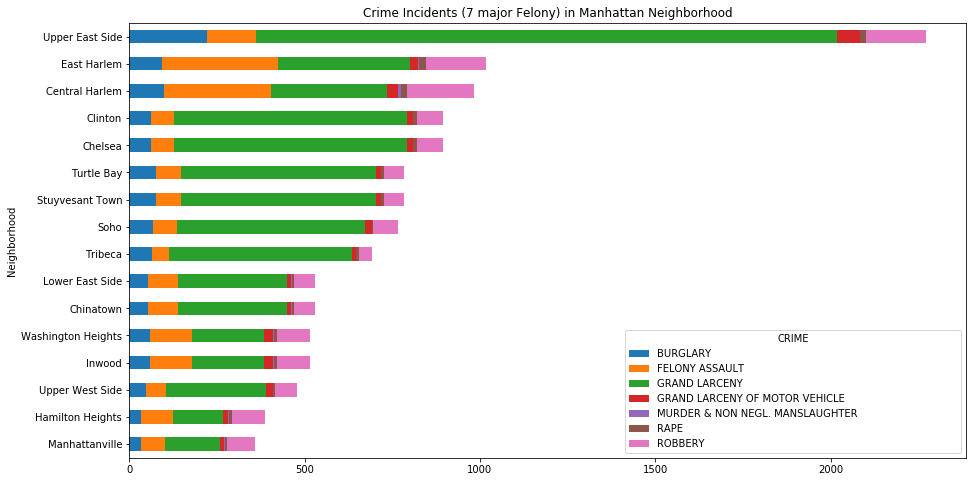

In [25]:
newMP.sort_values(by=['TotalCrime'], inplace=True)
newMP.drop(columns='TotalCrime').plot(kind='barh', stacked=True, title="Crime Incidents (7 major Felony) in Manhattan Neighborhood", figsize=(15,8))
#legend(loc='upper center', shadow=True, ncol=2)


#### While transforming newMP we lost the longlat columns. So we need to recreate a ComboMP (neighborhood + Crime)

In [26]:
newMP.shape
ComboMP=pd.merge(neighbor,newMP, on='Neighborhood')
ComboMP=ComboMP.dropna().drop_duplicates()
ComboMP=ComboMP.rename(columns={'Neighborhood':'name'})
ComboMP.head()

,Borough,name,Latitude,Longitude,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON NEGL. MANSLAUGHTER,RAPE,ROBBERY,TotalCrime
0,Manhattan,Chinatown,40.715618,-73.994279,53.0,87.166667,309.333333,11.833333,1.5,6.00,59.833333,529.0
1,Manhattan,Washington Heights,40.851903,-73.936900,59.0,121.250000,205.250000,25.000000,2.5,8.25,93.000000,514.0
2,Manhattan,Inwood,40.867684,-73.921210,59.0,121.250000,205.250000,25.000000,2.5,8.25,93.000000,514.0
3,Manhattan,Hamilton Heights,40.823604,-73.949688,34.5,89.000000,144.500000,13.500000,2.0,10.00,95.000000,388.0
4,Manhattan,Manhattanville,40.816934,-73.957385,35.0,68.000000,155.750000,12.000000,1.5,7.00,79.500000,359.0


In [27]:
ComboMP=ComboMP.reset_index()
ComboMP.dtypes

index                                                                 int64
Borough                                                              object
name                                                                 object
Latitude                                                            float64
Longitude                                                           float64
BURGLARY                                                            float64
FELONY ASSAULT                                                      float64
GRAND LARCENY                                                       float64
GRAND LARCENY OF MOTOR VEHICLE                                      float64
MURDER & NON NEGL. MANSLAUGHTER                                     float64
RAPE                                                                float64
ROBBERY                                                             float64
TotalCrime                                                          float64
dtype: objec

#### Visualizing using Cholopleth MAP 
(Note : Only partial  the NYC Geoson data matches our neighborhood definition/namingscheme. Unfortunately the naming and definition of Neighborhood is not consistent and hence might need more time for customization . A customized geoson file is needed to populate for the whole Manhattan.

In [28]:
latitude = 40.7896239
longitude = -73.9598939
world_geo = r'nyc-neighbor-geojson.json' # geojson file
# create a plain world map
newyork = folium.Map(location=[latitude, longitude], zoom_start=12, height=500, width=800, control_scale=True,)

# generate choropleth map 3
newyork.choropleth(
    geo_data=world_geo,
    data= ComboMP,
  #  name='Choropleth',
    columns=['name','TotalCrime'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name = 'Crime in Manhattan'
)
# display map
newyork

D:\Anaconda\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [29]:
len(ComboMP['name'].unique())

16

In [30]:
print('Our Manhattan Dataframe has {} neighborhoods and {} parameters.'.format(
        len(ComboMP['name'].unique()),
        ComboMP.shape[1]
    )
)
ComboMP.head(5)

Our Manhattan Dataframe has 16 neighborhoods and 13 parameters.


,index,Borough,name,Latitude,Longitude,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON NEGL. MANSLAUGHTER,RAPE,ROBBERY,TotalCrime
0,0,Manhattan,Chinatown,40.715618,-73.994279,53.0,87.166667,309.333333,11.833333,1.5,6.00,59.833333,529.0
1,1,Manhattan,Washington Heights,40.851903,-73.936900,59.0,121.250000,205.250000,25.000000,2.5,8.25,93.000000,514.0
2,2,Manhattan,Inwood,40.867684,-73.921210,59.0,121.250000,205.250000,25.000000,2.5,8.25,93.000000,514.0
3,3,Manhattan,Hamilton Heights,40.823604,-73.949688,34.5,89.000000,144.500000,13.500000,2.0,10.00,95.000000,388.0
4,4,Manhattan,Manhattanville,40.816934,-73.957385,35.0,68.000000,155.750000,12.000000,1.5,7.00,79.500000,359.0


In [31]:
import folium

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], height=500, width=800, zoom_start=12)

# add markers to map
for lat, lng, total, neighborhood in zip(ComboMP['Latitude'],ComboMP['Longitude'], ComboMP['TotalCrime'], ComboMP['name']):
    label = " 2019 Neighborhood:{0} has  Total Crime:{1}".format(neighborhood, total)
    label = folium.Popup(label, parse_html=False)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
map_newyork

### Exploring 2nd and 3rd Neighborhood Parameters  (Median Income and Population)

In [32]:
nyIncomePopulation = pd.read_csv('population and income.csv')
nypi = pd.DataFrame(nyIncomePopulation)
nypi.columns
nypi.dropna().drop(columns='Unnamed: 0').reset_index(inplace=True)
nypi.drop(columns='Borough').reset_index(inplace=True)
nypi=nypi.drop(columns=['Unnamed: 0','Borough'])
nypi.head(5)

,Neighborhood,Median Household Income,Population
0,Tribeca,125434,42742
1,Central Harlem,41390,75282
2,Chinatown,35908,52375
3,Clinton,73591,40595
4,East Harlem,30978,114047


### Combining all parameters so far in nypi dataframe (1.Income and 2.Population) into ComboMP dataframe (3.Crime/ Latlong)

In [33]:
# Restroing name=Neighborhood for Readability (note name is used for map generation to match with key parameter (name) in NYC Geoson file)
ComboMP=ComboMP.rename(columns={'name':'Neighborhood'})
ComboMP.head(5)

,index,Borough,Neighborhood,Latitude,Longitude,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON NEGL. MANSLAUGHTER,RAPE,ROBBERY,TotalCrime
0,0,Manhattan,Chinatown,40.715618,-73.994279,53.0,87.166667,309.333333,11.833333,1.5,6.00,59.833333,529.0
1,1,Manhattan,Washington Heights,40.851903,-73.936900,59.0,121.250000,205.250000,25.000000,2.5,8.25,93.000000,514.0
2,2,Manhattan,Inwood,40.867684,-73.921210,59.0,121.250000,205.250000,25.000000,2.5,8.25,93.000000,514.0
3,3,Manhattan,Hamilton Heights,40.823604,-73.949688,34.5,89.000000,144.500000,13.500000,2.0,10.00,95.000000,388.0
4,4,Manhattan,Manhattanville,40.816934,-73.957385,35.0,68.000000,155.750000,12.000000,1.5,7.00,79.500000,359.0


In [34]:
AllComboMP=pd.merge(nypi,ComboMP, on='Neighborhood')
AllComboMP.head(5)

,Neighborhood,Median Household Income,Population,index,Borough,Latitude,Longitude,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON NEGL. MANSLAUGHTER,RAPE,ROBBERY,TotalCrime
0,Tribeca,125434,42742,12,Manhattan,40.721522,-74.010683,65.5,49.000000,522.000000,9.500000,0.50,7.5,39.000000,693.0
1,Central Harlem,41390,75282,5,Manhattan,40.815976,-73.943211,100.0,305.000000,331.500000,31.000000,7.50,18.0,191.000000,984.0
2,Chinatown,35908,52375,0,Manhattan,40.715618,-73.994279,53.0,87.166667,309.333333,11.833333,1.50,6.0,59.833333,529.0
3,Clinton,73591,40595,9,Manhattan,40.759101,-73.996119,62.0,66.750000,662.500000,18.000000,0.25,11.0,73.500000,894.0
4,East Harlem,30978,114047,6,Manhattan,40.792249,-73.944182,93.5,329.500000,379.000000,21.000000,2.50,21.5,170.000000,1017.0


### Now Let's Work on our 4th and 5th Parameters, Sport and Green infrastructure, Obtained from Foursquare API services

In [35]:
CLIENT_ID = 'NV302VFU2I4SNLD3LGDE5Y3CC5TTDRTXLAKEXTXFW23FE4LM' # your Foursquare ID
CLIENT_SECRET = 'CCJRZEDL05ZKKEQQ5XAHVOYP5D3Z52T4DBCMESHXSICVDH3R' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NV302VFU2I4SNLD3LGDE5Y3CC5TTDRTXLAKEXTXFW23FE4LM
CLIENT_SECRET:CCJRZEDL05ZKKEQQ5XAHVOYP5D3Z52T4DBCMESHXSICVDH3R


In [36]:
# Rename AllCombo readability and backup, so lets now call it manhattan data
manhattan_data = AllComboMP
manhattan_data.head(16)

,Neighborhood,Median Household Income,Population,index,Borough,Latitude,Longitude,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON NEGL. MANSLAUGHTER,RAPE,ROBBERY,TotalCrime
0,Tribeca,125434,42742,12,Manhattan,40.721522,-74.010683,65.50,49.000000,522.000000,9.500000,0.50,7.50,39.000000,693.0
1,Central Harlem,41390,75282,5,Manhattan,40.815976,-73.943211,100.00,305.000000,331.500000,31.000000,7.50,18.00,191.000000,984.0
2,Chinatown,35908,52375,0,Manhattan,40.715618,-73.994279,53.00,87.166667,309.333333,11.833333,1.50,6.00,59.833333,529.0
3,Clinton,73591,40595,9,Manhattan,40.759101,-73.996119,62.00,66.750000,662.500000,18.000000,0.25,11.00,73.500000,894.0
4,East Harlem,30978,114047,6,Manhattan,40.792249,-73.944182,93.50,329.500000,379.000000,21.000000,2.50,21.50,170.000000,1017.0
5,Hamilton Heights,39019,50555,3,Manhattan,40.823604,-73.949688,34.50,89.000000,144.500000,13.500000,2.00,10.00,95.000000,388.0
6,Chelsea,101369,55839,10,Manhattan,40.744035,-74.003116,62.00,66.750000,662.500000,18.000000,0.25,11.00,73.500000,894.0
7,Lower East Side,31273,72258,11,Manhattan,40.717807,-73.980890,53.00,87.166667,309.333333,11.833333,1.50,6.00,59.833333,529.0
8,Manhattanville,29182,24772,4,Manhattan,40.816934,-73.957385,35.00,68.000000,155.750000,12.000000,1.50,7.00,79.500000,359.0
9,Inwood,39003,49087,2,Manhattan,40.867684,-73.921210,59.00,121.250000,205.250000,25.000000,2.50,8.25,93.000000,514.0


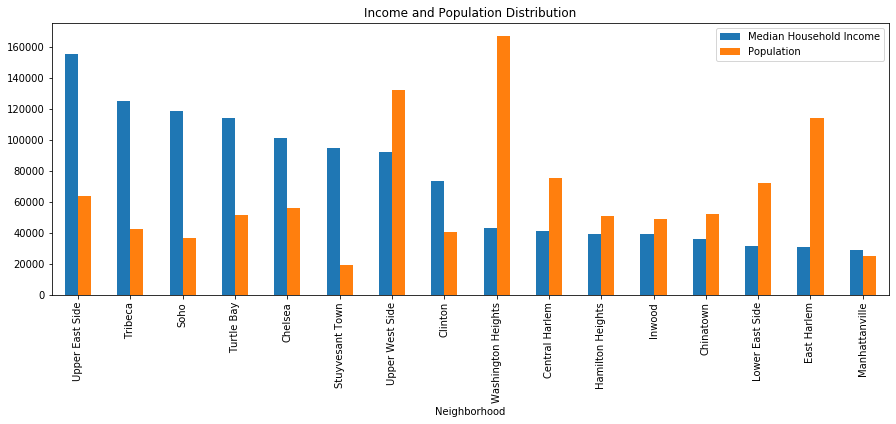

In [37]:
income_population = manhattan_data[['Neighborhood', 'Median Household Income','Population']]
income_population=income_population.set_index('Neighborhood')
income_population.sort_values(by=['Median Household Income'], inplace=True, ascending=False)

income_population.plot(kind="bar", title="Income and Population Distribution", stacked=False, figsize=(15,5))

Text(0, 0.5, 'Median Household Income')

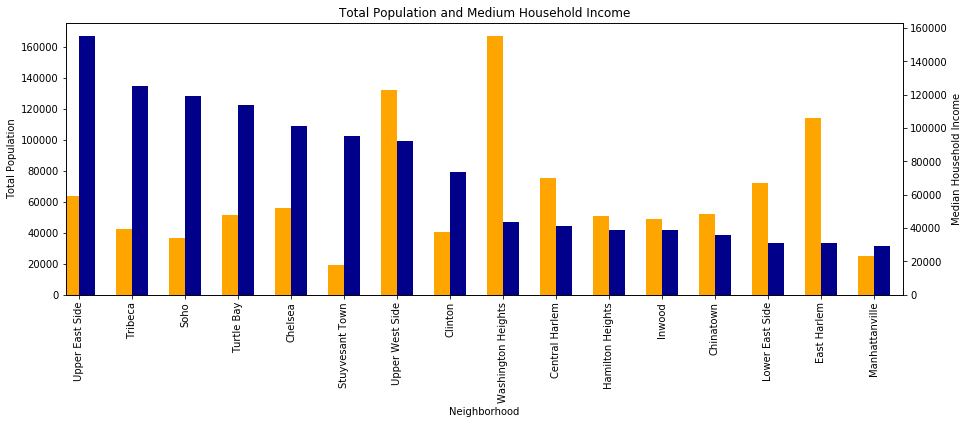

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

income_population['Population'].plot(kind='bar', color='orange', ax=ax, width=0.3, position=1, figsize=(15,5))
income_population['Median Household Income'].plot(kind='bar', color='darkblue', ax=ax2, width=0.3, position=0)

ax.set_title('Total Population and Medium Household Income')
ax.set_ylabel('Total Population')
ax2.set_ylabel('Median Household Income')

In [40]:
income_vsCrime = manhattan_data[['Neighborhood','Median Household Income','TotalCrime']]
income_vsCrime=income_vsCrime.set_index('Neighborhood')
income_vsCrime

,Median Household Income,TotalCrime
Neighborhood,,
Tribeca,125434,693.0
Central Harlem,41390,984.0
Chinatown,35908,529.0
Clinton,73591,894.0
East Harlem,30978,1017.0
Hamilton Heights,39019,388.0
Chelsea,101369,894.0
Lower East Side,31273,529.0
Manhattanville,29182,359.0


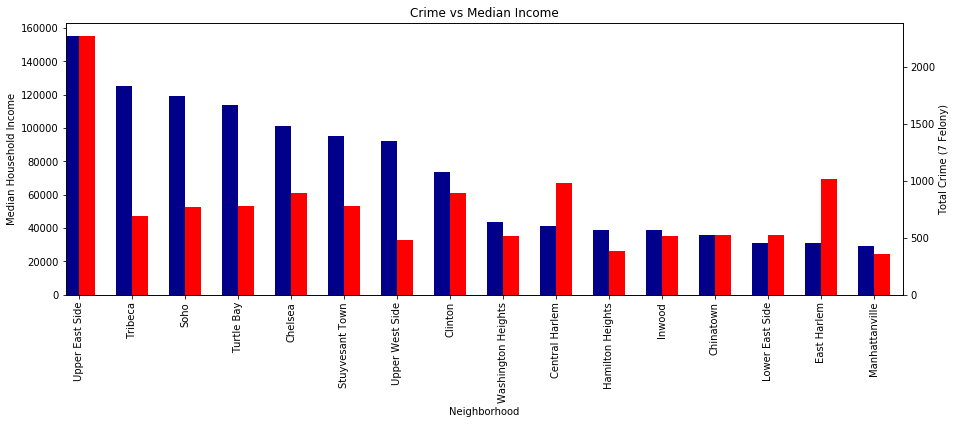

In [41]:
income_vsCrime.sort_values(by=['Median Household Income'], inplace=True, ascending=False)

import matplotlib.pyplot as plt

fig_1 = plt.figure(1)  # create new image and assign the variable "fig_1" to it
AX = fig_1.add_subplot(111)  # add subplot to "fig_1" and assign another name to it
AX.set_title("Crime vs Median Income")  # set title
AX2 = AX.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

income_vsCrime['Median Household Income'].plot(kind='bar', color='darkblue', ax=AX, width=0.3, position=1, figsize=(15,5))
income_vsCrime.TotalCrime.plot(kind='bar', color='red', ax=AX2, width=0.3, position=0)

AX2.set_ylabel('Total Crime (7 Felony)')
AX.set_ylabel('Median Household Income')

plt.show()

Text(0, 0.5, 'Household Income')

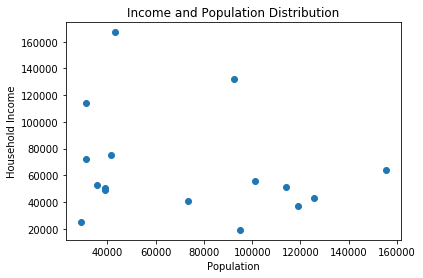

In [42]:
income_population = manhattan_data[['Neighborhood', 'Median Household Income','Population']]
income_population=income_population.set_index('Neighborhood')
plt.scatter(x=income_population['Median Household Income'], y=income_population['Population'])
plt.title("Income and Population Distribution")
plt.xlabel("Population")
plt.ylabel("Household Income")

In [43]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [44]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NV302VFU2I4SNLD3LGDE5Y3CC5TTDRTXLAKEXTXFW23FE4LM&client_secret=CCJRZEDL05ZKKEQQ5XAHVOYP5D3Z52T4DBCMESHXSICVDH3R&v=20180605&ll=40.7896239,-73.9598939&radius=5000&limit=1000'

In [45]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed0adfe542890001b4ec197'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'New York',
  'headerFullLocation': 'New York',
  'headerLocationGranularity': 'city',
  'totalResults': 239,
  'suggestedBounds': {'ne': {'lat': 40.83462394500005,
    'lng': -73.90056853843416},
   'sw': {'lat': 40.74462385499996, 'lng': -74.01921926156584}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ba233dbf964a5206fe337e3',
       'name': 'East Meadow',
       'location': {'address': 'Central Park',
        'crossStreet': '5th Ave btwn 98th & 101st St',
        'lat': 40.79015961797437,
        'lng': -73.95549774169922,


### List venues and Extract the category of the venue (Foursquare Data)


In [46]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [47]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,East Meadow,Field,40.790160,-73.955498
1,North Meadow,Park,40.792027,-73.959853
2,The Jewish Museum,Museum,40.785276,-73.957411
3,Jacqueline Kennedy Onassis Reservoir,Reservoir,40.784519,-73.960966
4,Da Capo,Café,40.787679,-73.953899


In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [49]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Tribeca
Central Harlem
Chinatown
Clinton
East Harlem
Hamilton Heights
Chelsea
Lower East Side
Manhattanville
Inwood
Soho
Stuyvesant Town
Turtle Bay
Upper East Side
Upper West Side
Washington Heights


In [52]:
manhattan_venues.to_csv('manhattanVenue.data')
print(manhattan_venues.shape)
manhattan_venues.head(30)

(1125, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tribeca,40.721522,-74.010683,Pier 26 - Hudson River Park,40.720947,-74.012948,Park
1,Tribeca,40.721522,-74.010683,Flywheel Sports,40.721920,-74.009690,Cycle Studio
2,Tribeca,40.721522,-74.010683,Wolfgang's Steakhouse,40.721252,-74.010099,Steakhouse
3,Tribeca,40.721522,-74.010683,Wisefish Poké,40.721805,-74.009905,Poke Place
4,Tribeca,40.721522,-74.010683,Locanda Verde,40.719981,-74.010002,Italian Restaurant
5,Tribeca,40.721522,-74.010683,Verve Wine,40.721415,-74.010117,Wine Shop
6,Tribeca,40.721522,-74.010683,Sushi Azabu,40.722355,-74.009750,Sushi Restaurant
7,Tribeca,40.721522,-74.010683,Greenwich Hotel,40.719876,-74.009949,Hotel
8,Tribeca,40.721522,-74.010683,Pier 25 - Hudson River Park,40.720193,-74.012950,Park
9,Tribeca,40.721522,-74.010683,sweetgreen,40.721335,-74.009701,Salad Place


### Recategorizing Exteacted Venues to Green Infrastructure 

In [53]:
manhattan_venues['Venue Category'] = manhattan_venues['Venue Category'].replace(['Park','Playground','Harbor / Marina','Fountain','Garden','Trail','Sculpture Garden','Bike Trail'], 'Green Infrastructure')

### Recategorizing Exteacted Venues to Sport Infrastructure 

In [58]:
manhattan_venues['Venue Category'] = manhattan_venues['Venue Category'].replace(['Yoga Studio','Baseball Field','Boxing Gym','Pilates Studio','Pool','Tennis Court','Climbing Gym','Bike Trail','Skate Park','Gym / Fitness Center','Gym','Rock Climbing Spot' ,'Track','Volleyball Court'
,'Gym Pool','Mini Golf','Basketball Court'], 'Sport Infrastructure')

In [59]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Central Harlem,46,46,46,46,46,46
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,41,41,41,41,41,41
Hamilton Heights,60,60,60,60,60,60
Inwood,57,57,57,57,57,57
Lower East Side,44,44,44,44,44,44
Manhattanville,47,47,47,47,47,47


In [56]:
# Checking list of Avaialbale CAtegories from FourSquare Data
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))
print(manhattan_venues['Venue Category'].unique())

There are 229 uniques categories.
['Green Infrastructure' 'Cycle Studio' 'Steakhouse' 'Poke Place'
 'Italian Restaurant' 'Wine Shop' 'Sushi Restaurant' 'Hotel' 'Salad Place'
 'Café' 'Indie Theater' 'Spa' 'Wine Bar' 'Yoga Studio' 'Coffee Shop'
 'Greek Restaurant' 'American Restaurant' "Men's Store" 'Dog Run'
 'Boutique' 'Chinese Restaurant' 'Bakery' 'Argentinian Restaurant'
 'Indian Restaurant' 'Volleyball Court' 'Gym Pool' 'Whisky Bar'
 'Mini Golf' 'Korean Restaurant' 'Scenic Lookout' 'Event Space'
 'Roof Deck' 'Performing Arts Venue' 'Seafood Restaurant' 'Skate Park'
 'Noodle House' 'Gym / Fitness Center' 'Art Gallery' 'Basketball Court'
 'Modern European Restaurant' 'French Restaurant' 'Clothing Store' 'Pub'
 'High School' 'Bike Rental / Bike Share' 'Bar' 'Beer Bar' 'Library'
 'Music Venue' 'African Restaurant' 'Jazz Club' 'Ethiopian Restaurant'
 'Dessert Shop' 'Cocktail Bar' 'Cosmetics Shop' 'Juice Bar' 'Bagel Shop'
 'Food Truck' 'Cafeteria' 'Pizza Place' 'Fried Chicken Joint'
 'Car

In [60]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()
sportgreenManhattan=manhattan_onehot[['Neighborhood','Green Infrastructure','Sport Infrastructure']]
sportgreenManhattan.head(5)

,Neighborhood,Green Infrastructure,Sport Infrastructure
0,Tribeca,1,0
1,Tribeca,0,0
2,Tribeca,0,0
3,Tribeca,0,0
4,Tribeca,0,0


In [61]:
sportgreenManhattan.shape

(1125, 3)

In [68]:
manhattan_grouped = sportgreenManhattan.groupby('Neighborhood').sum()
#manhattan_grouped = manhattan_grouped.set_index('Neighborhood')

### Counting Frequency of Green Infrastructure and Sport Infrastructure appeears in Manhattan Foursquare Data

In [69]:
manhattan_grouped

,Green Infrastructure,Sport Infrastructure
Neighborhood,,
Central Harlem,1,2
Chelsea,3,3
Chinatown,0,1
Clinton,2,10
East Harlem,1,1
Hamilton Heights,1,2
Inwood,3,1
Lower East Side,1,4
Manhattanville,4,1


### Analyzing and Visualizing Green and Sport Infrastructure in Manhattan

Text(0, 0.5, 'Frequency in Foursquare search')

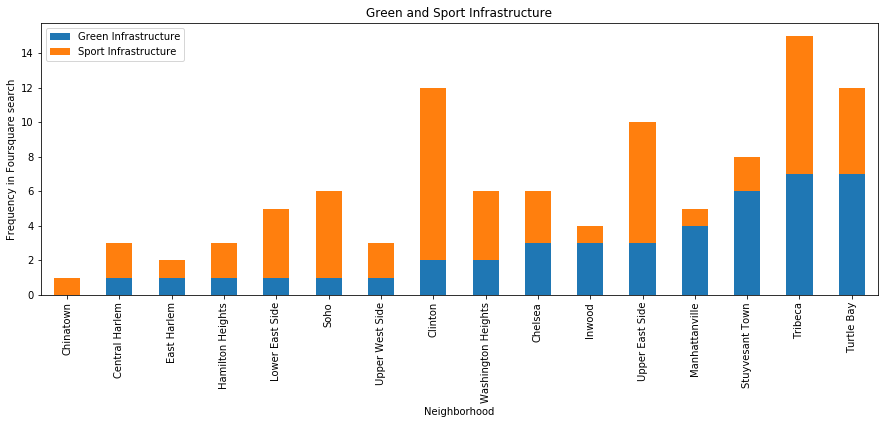

In [78]:
df = manhattan_grouped
from matplotlib import pyplot as plt
manhattan_grouped.sort_values(by=['Green Infrastructure']).plot(kind="bar", title="Distribution of Green and Sport Infrastructure", stacked=True, figsize=(15,5))
plt.title("Green and Sport Infrastructure")
plt.xlabel("Neighborhood")
plt.ylabel("Frequency in Foursquare search")
#df.plot.barh(rot=1, x='Green Infrastructure')

In [121]:
manhattan_grouped

,Green Infrastructure,Sport Infrastructure
Neighborhood,,
Central Harlem,1,2
Chelsea,3,3
Chinatown,0,1
Clinton,2,10
East Harlem,1,1
Hamilton Heights,1,2
Inwood,3,1
Lower East Side,1,4
Manhattanville,4,1


Text(0, 0.5, 'Total Crime (Based on 7 Major Crime)')

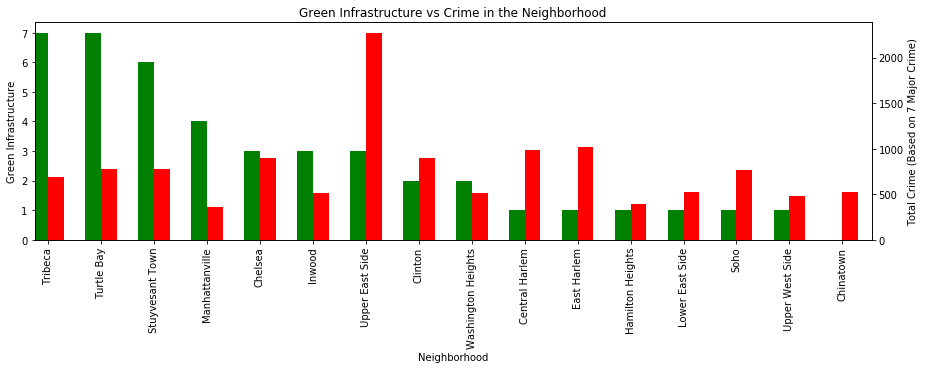

In [87]:
CrimeAndSport =pd.merge(manhattan_grouped,manhattan_data, on='Neighborhood')
CrimeAndSport = CrimeAndSport[['Neighborhood','Green Infrastructure','Sport Infrastructure','TotalCrime']].set_index('Neighborhood')

from matplotlib import pyplot as plt

fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax3 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
CrimeAndSport.sort_values(by=['Green Infrastructure'], inplace=True, ascending=False)
CrimeAndSport['Green Infrastructure'].plot(kind='bar', stacked=True, color='green', ax=ax, width=0.3, position=1, figsize=(15,4))
CrimeAndSport['TotalCrime'].plot(kind='bar', color='red', ax=ax3, width=0.3, position=0)
ax.set_title('Green Infrastructure vs Crime in the Neighborhood' )
ax.set_ylabel('Green Infrastructure')
ax3.set_ylabel('Total Crime (Based on 7 Major Crime)')

Text(0, 0.5, 'Total Crime (Based on 7 Major Crime)')

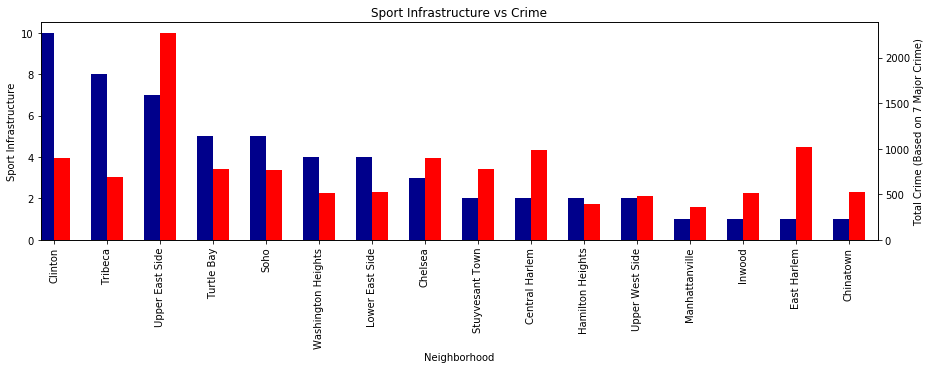

In [92]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax3 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
CrimeAndSport.sort_values(by=['Sport Infrastructure'], inplace=True, ascending=False)
CrimeAndSport['Sport Infrastructure'].plot(kind='bar', stacked=True, color='darkblue', ax=ax, width=0.3, position=1, figsize=(15,4))
CrimeAndSport['TotalCrime'].plot(kind='bar', color='red', ax=ax3, width=0.3, position=0)

ax.set_title('Sport Infrastructure vs Crime')
ax.set_ylabel('Sport Infrastructure')
ax3.set_ylabel('Total Crime (Based on 7 Major Crime)')

In [89]:
CrimeAndSport['GreenNSport'] = CrimeAndSport.loc[:,['Green Infrastructure','Sport Infrastructure']].sum(axis=1)
CrimeAndSport.rename(columns= {'Total':'Total Crime'}, inplace = True)

CrimeAndSport2=CrimeAndSport.drop(columns=['Green Infrastructure','Sport Infrastructure'])
CrimeAndSport2

,TotalCrime,GreenNSport
Neighborhood,,
Tribeca,693.0,15
Turtle Bay,782.0,12
Stuyvesant Town,782.0,8
Manhattanville,359.0,5
Chelsea,894.0,6
Inwood,514.0,4
Upper East Side,2273.0,10
Clinton,894.0,12
Washington Heights,514.0,6


Text(0, 0.5, 'Total Crime (Based on 7 Major Crime)')

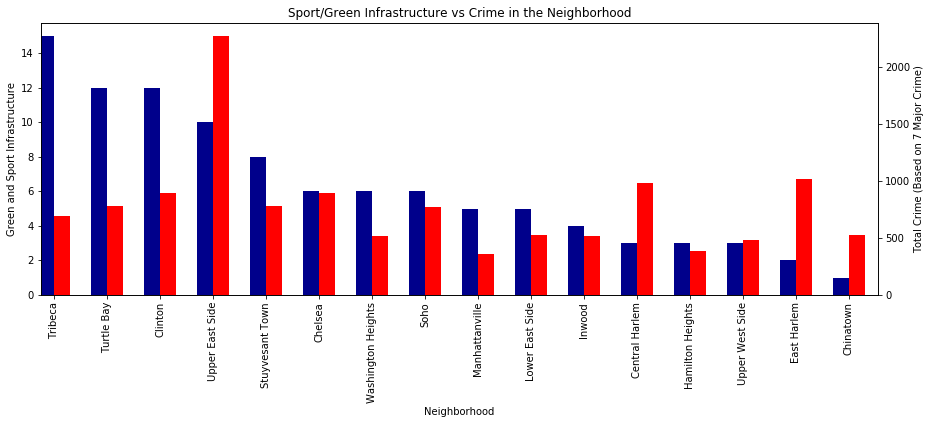

In [95]:
from matplotlib import pyplot as plt

fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax3 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
CrimeAndSport2.sort_values(by=['GreenNSport'], inplace=True, ascending=False)
CrimeAndSport2['GreenNSport'].plot(kind='bar', stacked=True, color='darkblue', ax=ax, width=0.3, position=1, figsize=(15,5))
CrimeAndSport2['TotalCrime'].plot(kind='bar', color='red', ax=ax3, width=0.3, position=0)

ax.set_title('Sport/Green Infrastructure vs Crime in the Neighborhood')
ax.set_ylabel('Green and Sport Infrastructure')
ax3.set_ylabel('Total Crime (Based on 7 Major Crime)')

In [117]:
manhattan_data

,Neighborhood,Median Household Income,Population,index,Borough,Latitude,Longitude,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON NEGL. MANSLAUGHTER,RAPE,ROBBERY,TotalCrime
0,Tribeca,125434,42742,12,Manhattan,40.721522,-74.010683,65.50,49.000000,522.000000,9.500000,0.50,7.50,39.000000,693.0
1,Central Harlem,41390,75282,5,Manhattan,40.815976,-73.943211,100.00,305.000000,331.500000,31.000000,7.50,18.00,191.000000,984.0
2,Chinatown,35908,52375,0,Manhattan,40.715618,-73.994279,53.00,87.166667,309.333333,11.833333,1.50,6.00,59.833333,529.0
3,Clinton,73591,40595,9,Manhattan,40.759101,-73.996119,62.00,66.750000,662.500000,18.000000,0.25,11.00,73.500000,894.0
4,East Harlem,30978,114047,6,Manhattan,40.792249,-73.944182,93.50,329.500000,379.000000,21.000000,2.50,21.50,170.000000,1017.0
5,Hamilton Heights,39019,50555,3,Manhattan,40.823604,-73.949688,34.50,89.000000,144.500000,13.500000,2.00,10.00,95.000000,388.0
6,Chelsea,101369,55839,10,Manhattan,40.744035,-74.003116,62.00,66.750000,662.500000,18.000000,0.25,11.00,73.500000,894.0
7,Lower East Side,31273,72258,11,Manhattan,40.717807,-73.980890,53.00,87.166667,309.333333,11.833333,1.50,6.00,59.833333,529.0
8,Manhattanville,29182,24772,4,Manhattan,40.816934,-73.957385,35.00,68.000000,155.750000,12.000000,1.50,7.00,79.500000,359.0
9,Inwood,39003,49087,2,Manhattan,40.867684,-73.921210,59.00,121.250000,205.250000,25.000000,2.50,8.25,93.000000,514.0


In [127]:
manhattan_grouped

,Green Infrastructure,Sport Infrastructure
Neighborhood,,
Central Harlem,1,2
Chelsea,3,3
Chinatown,0,1
Clinton,2,10
East Harlem,1,1
Hamilton Heights,1,2
Inwood,3,1
Lower East Side,1,4
Manhattanville,4,1


### One Summarize Dataset for all 5 Parameters of Neighborhood
1)Population,2)Median Household Income 3)Sport Infrastructure 4)Green Infrastructure, 5)TotalCrime

In [171]:
NeighborMetric=pd.merge(manhattan_grouped,manhattan_data, on='Neighborhood')
NeighborMetric = NeighborMetric[['Neighborhood','Population','Median Household Income','Sport Infrastructure','Green Infrastructure','TotalCrime']]
NeighborMetric

,Neighborhood,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
0,Central Harlem,75282,41390,2,1,984.0
1,Chelsea,55839,101369,3,3,894.0
2,Chinatown,52375,35908,1,0,529.0
3,Clinton,40595,73591,10,2,894.0
4,East Harlem,114047,30978,1,1,1017.0
5,Hamilton Heights,50555,39019,2,1,388.0
6,Inwood,49087,39003,1,3,514.0
7,Lower East Side,72258,31273,4,1,529.0
8,Manhattanville,24772,29182,1,4,359.0
9,Soho,36757,118931,5,1,767.0


Assessing Correlation between 5 Parameters

In [172]:
ParameterCorr = NeighborMetric.corr()
ParameterCorr

,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
Population,1.000000,-0.223327,-0.148076,-0.402467,-0.033772
Median Household Income,-0.223327,1.000000,0.603620,0.503112,0.594649
Sport Infrastructure,-0.148076,0.603620,1.000000,0.303615,0.415397
Green Infrastructure,-0.402467,0.503112,0.303615,1.000000,0.076245
TotalCrime,-0.033772,0.594649,0.415397,0.076245,1.000000


#### Note : Significant +ve Correlation 
- 1) Between Household Income and Total Crime, 
- 2)Sport Infrastructure and Crime 
- 3)Sport Infras and Income 
- 4)Green vs Income and 

-ve Correlation between 
- 1)  Green Infra vs Population 

In [138]:
ParameterCorr.describe()

,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.038472,0.495611,0.434911,0.296101,0.410504
std,0.553968,0.445200,0.419905,0.518343,0.415496
min,-0.402467,-0.223327,-0.148076,-0.402467,-0.033772
25%,-0.223327,0.503112,0.303615,0.076245,0.076245
50%,-0.148076,0.594649,0.415397,0.303615,0.415397
75%,-0.033772,0.603620,0.603620,0.503112,0.594649
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [227]:
import pandas as pd
from sklearn import preprocessing

# Set charts to view inline
%matplotlib inline
# Create x, where x the 'scores' column's values as floats
x = NeighborMetric[['Population','Median Household Income','Sport Infrastructure','Green Infrastructure','TotalCrime']]

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
NeighborMetric_normalized = pd.DataFrame(x_scaled)
NeighborMetric_normalized

,0,1,2,3,4
0,0.379532,0.096865,0.111111,0.142857,0.326541
1,0.248184,0.572772,0.222222,0.428571,0.279519
2,0.224783,0.053368,0.000000,0.000000,0.088819
3,0.145203,0.352366,1.000000,0.285714,0.279519
4,0.641410,0.014250,0.000000,0.142857,0.343783
5,0.212488,0.078052,0.111111,0.142857,0.015152
6,0.202571,0.077925,0.000000,0.428571,0.080982
7,0.359103,0.016591,0.333333,0.142857,0.088819
8,0.038311,0.000000,0.000000,0.571429,0.000000
9,0.119276,0.712118,0.444444,0.142857,0.213166


In [230]:
NeighborMetric_normalized=NeighborMetric_normalized[['Population','Median Household Income','Sport Infrastructure','Green Infrastructure','TotalCrime']]

Since We are dealing wih multiple independent variable, can we use multilinear prediction to estimate crime rate

In [231]:
NeighborMetric_normalized

,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
0,0.379532,0.096865,0.111111,0.142857,0.326541
1,0.248184,0.572772,0.222222,0.428571,0.279519
2,0.224783,0.053368,0.000000,0.000000,0.088819
3,0.145203,0.352366,1.000000,0.285714,0.279519
4,0.641410,0.014250,0.000000,0.142857,0.343783
5,0.212488,0.078052,0.111111,0.142857,0.015152
6,0.202571,0.077925,0.000000,0.428571,0.080982
7,0.359103,0.016591,0.333333,0.142857,0.088819
8,0.038311,0.000000,0.000000,0.571429,0.000000
9,0.119276,0.712118,0.444444,0.142857,0.213166


In [240]:
import numpy as np
from sklearn import linear_model
#NeighborMetric_normalized=.NeighborMetric_normalized.rename(columns={'0':'Population','1':'Median Household Income','2':'Sport Infrastructure','3':'Green Infrastructure','4':'TotalCrime'}) 
Y=NeighborMetric_normalized['TotalCrime']
X=NeighborMetric_normalized[['Population','Median Household Income','Sport Infrastructure','Green Infrastructure']]


regr=LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print(regr.coef_)
#print('Coefficients:'' {} 'xPopulation + {2} xIncome +{3}SportInfra +{4}xGreenInfra \n').format(regr.coef_[0], regr.coef_[1],regr.coef_[2],regr.coef_[3])
print("Population     |  MedianIncome   |  Green Infrastructure  |  Sport Infrastrcuture")
print(regr.coef_[0] , regr.coef_[1], regr.coef_[2], regr.coef_[3]) 

#TotalCrime = Interception + I x MedianIncome +  G x Green Infrastructure +  S x SportInfrastructure + P x Population

Intercept: 
 0.10421619754242245
[ 0.01416825  0.49353995  0.06861184 -0.21481559]
Population     |  MedianIncome   |  Green Infrastructure  |  Sport Infrastrcuture
0.014168250784884876 0.49353995203090123 0.06861183698536587 -0.2148155862830695


### Plotting Regression

In [248]:
NeighborMetric_normalized

,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
0,0.379532,0.096865,0.111111,0.142857,0.326541
1,0.248184,0.572772,0.222222,0.428571,0.279519
2,0.224783,0.053368,0.000000,0.000000,0.088819
3,0.145203,0.352366,1.000000,0.285714,0.279519
4,0.641410,0.014250,0.000000,0.142857,0.343783
5,0.212488,0.078052,0.111111,0.142857,0.015152
6,0.202571,0.077925,0.000000,0.428571,0.080982
7,0.359103,0.016591,0.333333,0.142857,0.088819
8,0.038311,0.000000,0.000000,0.571429,0.000000
9,0.119276,0.712118,0.444444,0.142857,0.213166


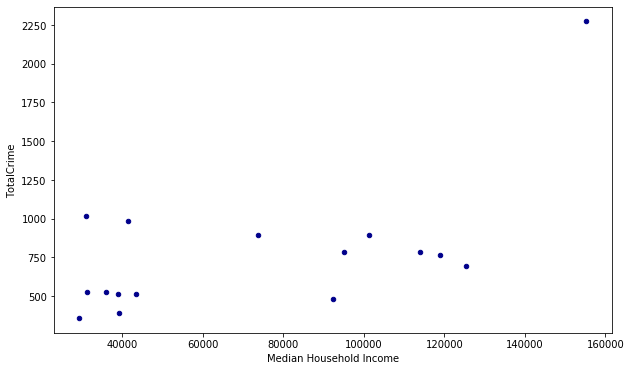

In [270]:
#x=NeighborMetric_normalized['Median Household Income']
#y=NeighborMetric_normalized['TotalCrime']
temp=NeighborMetric[['Median Household Income','TotalCrime']]
x = temp['Median Household Income'].astype(int)
y = temp['TotalCrime'].astype(int)
    
temp.plot(kind='scatter', x='Median Household Income', y='TotalCrime', figsize=(10, 6), color='darkblue')

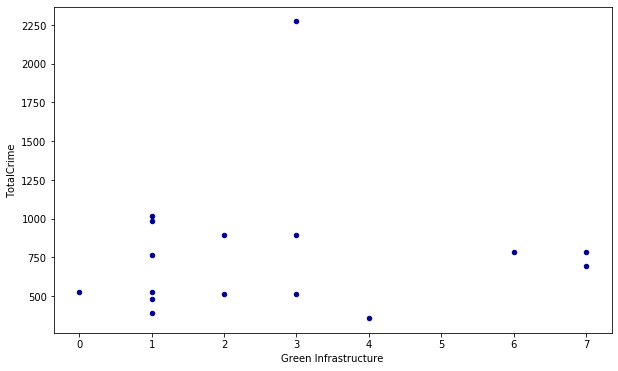

In [272]:
#x=NeighborMetric_normalized['Median Household Income']
#y=NeighborMetric_normalized['TotalCrime']
temp=NeighborMetric[['Green Infrastructure','TotalCrime']]
x = temp['Green Infrastructure'].astype(int)
y = temp['TotalCrime'].astype(int)
    
temp.plot(kind='scatter', x='Green Infrastructure', y='TotalCrime', figsize=(10, 6), color='darkblue')

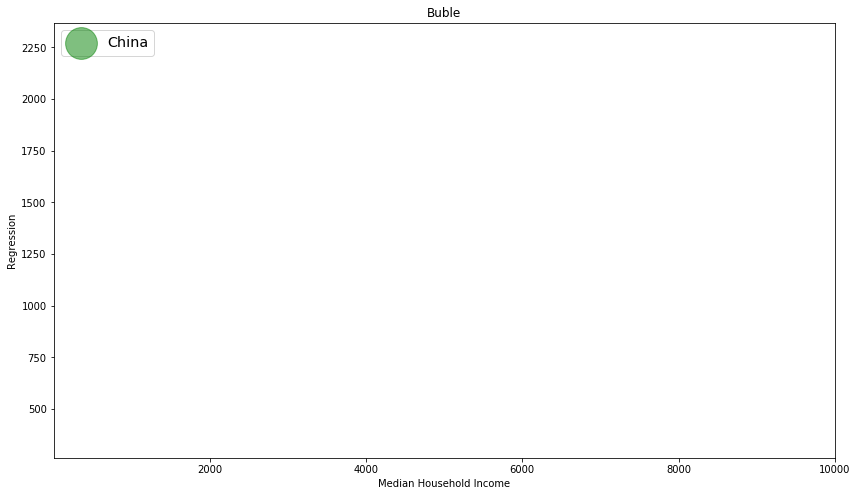

In [284]:
temp=NeighborMetric[['Median Household Income','TotalCrime']]
x = temp['Median Household Income'].astype(int)
y = temp['TotalCrime'].astype(int)

norm_ = (temp['TotalCrime'] - temp['TotalCrime'].min()) / (temp['TotalCrime'].max() - temp['TotalCrime'].min())

ax0 = temp.plot(kind='scatter',
                    x='Median Household Income',
                    y='TotalCrime',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_ * 2000 + 10,  # pass in weights 
                    xlim=(1,10000)
                   )


ax0.set_ylabel('Regression')
ax0.set_title('Buble')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

In [285]:
#Cluster Neighborhood
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = NeighborMetric.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 1, 0, 2, 1, 1, 1, 1, 0])

In [290]:
manhattan_grouped_clustering

,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
0,75282,41390,2,1,984.0
1,55839,101369,3,3,894.0
2,52375,35908,1,0,529.0
3,40595,73591,10,2,894.0
4,114047,30978,1,1,1017.0
5,50555,39019,2,1,388.0
6,49087,39003,1,3,514.0
7,72258,31273,4,1,529.0
8,24772,29182,1,4,359.0
9,36757,118931,5,1,767.0


In [294]:
#manhattan_merged.drop(columns='Cluster Labels')
manhattan_data

,Neighborhood,Median Household Income,Population,index,Borough,Latitude,Longitude,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON NEGL. MANSLAUGHTER,RAPE,ROBBERY,TotalCrime
0,Tribeca,125434,42742,12,Manhattan,40.721522,-74.010683,65.50,49.000000,522.000000,9.500000,0.50,7.50,39.000000,693.0
1,Central Harlem,41390,75282,5,Manhattan,40.815976,-73.943211,100.00,305.000000,331.500000,31.000000,7.50,18.00,191.000000,984.0
2,Chinatown,35908,52375,0,Manhattan,40.715618,-73.994279,53.00,87.166667,309.333333,11.833333,1.50,6.00,59.833333,529.0
3,Clinton,73591,40595,9,Manhattan,40.759101,-73.996119,62.00,66.750000,662.500000,18.000000,0.25,11.00,73.500000,894.0
4,East Harlem,30978,114047,6,Manhattan,40.792249,-73.944182,93.50,329.500000,379.000000,21.000000,2.50,21.50,170.000000,1017.0
5,Hamilton Heights,39019,50555,3,Manhattan,40.823604,-73.949688,34.50,89.000000,144.500000,13.500000,2.00,10.00,95.000000,388.0
6,Chelsea,101369,55839,10,Manhattan,40.744035,-74.003116,62.00,66.750000,662.500000,18.000000,0.25,11.00,73.500000,894.0
7,Lower East Side,31273,72258,11,Manhattan,40.717807,-73.980890,53.00,87.166667,309.333333,11.833333,1.50,6.00,59.833333,529.0
8,Manhattanville,29182,24772,4,Manhattan,40.816934,-73.957385,35.00,68.000000,155.750000,12.000000,1.50,7.00,79.500000,359.0
9,Inwood,39003,49087,2,Manhattan,40.867684,-73.921210,59.00,121.250000,205.250000,25.000000,2.50,8.25,93.000000,514.0


In [310]:
# add clustering labels
NeighborMetric_Clustered= NeighborMetric.insert(0, 'Cluster Labels', kmeans.labels_)
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
#manhattan_merged = manhattan_merged.join(manhattan_grouped_clustering.set_index('Neighborhood'), on='Neighborhood')

#manhattan_merged.head() # check the last columns!

ValueError: cannot insert Cluster Labels, already exists

In [292]:
NeighborMetric

,Cluster Labels,Neighborhood,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
0,1,Central Harlem,75282,41390,2,1,984.0
1,0,Chelsea,55839,101369,3,3,894.0
2,1,Chinatown,52375,35908,1,0,529.0
3,0,Clinton,40595,73591,10,2,894.0
4,2,East Harlem,114047,30978,1,1,1017.0
5,1,Hamilton Heights,50555,39019,2,1,388.0
6,1,Inwood,49087,39003,1,3,514.0
7,1,Lower East Side,72258,31273,4,1,529.0
8,1,Manhattanville,24772,29182,1,4,359.0
9,0,Soho,36757,118931,5,1,767.0


In [309]:
NeighborMetric.describe()

,Cluster Labels,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000
mean,1.062500,65488.187500,72870.875000,3.625000,2.68750,774.875000
std,1.181454,40033.637983,41594.269288,2.753785,2.24258,450.863745
min,0.000000,19101.000000,29182.000000,1.000000,0.00000,359.000000
25%,0.000000,42205.250000,38229.250000,1.750000,1.00000,514.000000
50%,1.000000,51803.000000,58473.000000,2.500000,2.00000,730.000000
75%,1.250000,73014.000000,104526.250000,5.000000,3.25000,894.000000
max,4.000000,167128.000000,155213.000000,10.000000,7.00000,2273.000000


In [302]:
manhattan_coord=manhattan_data[['Neighborhood','Longitude','Latitude']]
NeighborMetric_Coord=pd.merge(manhattan_coord, NeighborMetric, on='Neighborhood')
NeighborMetric_Coord

,Neighborhood,Longitude,Latitude,Cluster Labels,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
0,Tribeca,-74.010683,40.721522,0,42742,125434,8,7,693.0
1,Central Harlem,-73.943211,40.815976,1,75282,41390,2,1,984.0
2,Chinatown,-73.994279,40.715618,1,52375,35908,1,0,529.0
3,Clinton,-73.996119,40.759101,0,40595,73591,10,2,894.0
4,East Harlem,-73.944182,40.792249,2,114047,30978,1,1,1017.0
5,Hamilton Heights,-73.949688,40.823604,1,50555,39019,2,1,388.0
6,Chelsea,-74.003116,40.744035,0,55839,101369,3,3,894.0
7,Lower East Side,-73.980890,40.717807,1,72258,31273,4,1,529.0
8,Manhattanville,-73.957385,40.816934,1,24772,29182,1,4,359.0
9,Inwood,-73.921210,40.867684,1,49087,39003,1,3,514.0


In [303]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NeighborMetric_Coord['Latitude'], NeighborMetric_Coord['Longitude'], NeighborMetric_Coord['Neighborhood'], NeighborMetric_Coord['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup= label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [304]:
#NeighborMetric.loc[NeighborMetric['Cluster Labels'] == 0, NeighborMetric.columns[[1] + list(range(1, NeighborMetric.shape[1]))]]
NeighborMetric.loc[NeighborMetric['Cluster Labels'] == 0]

,Cluster Labels,Neighborhood,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
1,0,Chelsea,55839,101369,3,3,894.0
3,0,Clinton,40595,73591,10,2,894.0
9,0,Soho,36757,118931,5,1,767.0
10,0,Stuyvesant Town,19101,95022,2,6,782.0
11,0,Tribeca,42742,125434,8,7,693.0
12,0,Turtle Bay,51231,113998,5,7,782.0


In [305]:
#NeighborMetric.loc[NeighborMetric['Cluster Labels'] == 1, NeighborMetric.columns[[1] + list(range(5, NeighborMetric.shape[1]))]]
NeighborMetric.loc[NeighborMetric['Cluster Labels'] == 1]

,Cluster Labels,Neighborhood,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
0,1,Central Harlem,75282,41390,2,1,984.0
2,1,Chinatown,52375,35908,1,0,529.0
5,1,Hamilton Heights,50555,39019,2,1,388.0
6,1,Inwood,49087,39003,1,3,514.0
7,1,Lower East Side,72258,31273,4,1,529.0
8,1,Manhattanville,24772,29182,1,4,359.0


In [306]:
#NeighborMetric.loc[NeighborMetric['Cluster Labels'] == 2, NeighborMetric.columns[[1] + list(range(5, NeighborMetric.shape[1]))]]
NeighborMetric.loc[NeighborMetric['Cluster Labels'] == 2]

,Cluster Labels,Neighborhood,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
4,2,East Harlem,114047,30978,1,1,1017.0
15,2,Washington Heights,167128,43355,4,2,514.0


In [307]:
#NeighborMetric.loc[NeighborMetric['Cluster Labels'] == 3, NeighborMetric.columns[[1] + list(range(5, NeighborMetric.shape[1]))]]
NeighborMetric.loc[NeighborMetric['Cluster Labels'] == 3]

,Cluster Labels,Neighborhood,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
14,3,Upper West Side,132378,92268,2,1,479.0


In [308]:
NeighborMetric.loc[NeighborMetric['Cluster Labels'] == 4]

,Cluster Labels,Neighborhood,Population,Median Household Income,Sport Infrastructure,Green Infrastructure,TotalCrime
13,4,Upper East Side,63664,155213,7,3,2273.0


In [316]:
%pip install plotly==4.8.1

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=8e590a26197b8cdc4a944ff228277afb22c2675c6c581b20d3f65ba786bea51c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [341]:

import plotly.graph_objects as go

categories = ['processing cost','mechanical properties','chemical stability','thermal stability', 'device integration']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1, 5, 2, 2, 3],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 3, 2.5, 1, 2],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()